<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Isolation-Forest-:-base-de-données-Mouse" data-toc-modified-id="Isolation-Forest-:-base-de-données-Mouse-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Isolation Forest : base de données Mouse</a></span><ul class="toc-item"><li><span><a href="#Téléchargement-et-analyse-du-jeu-de-données" data-toc-modified-id="Téléchargement-et-analyse-du-jeu-de-données-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Téléchargement et analyse du jeu de données</a></span></li><li><span><a href="#Représentation-graphique-des-données" data-toc-modified-id="Représentation-graphique-des-données-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Représentation graphique des données</a></span></li><li><span><a href="#Détection-des-anomalies-dans-ce-jeu-de-données" data-toc-modified-id="Détection-des-anomalies-dans-ce-jeu-de-données-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Détection des anomalies dans ce jeu de données</a></span></li></ul></li><li><span><a href="#Jeu-de-données-Cartes-de-crédit" data-toc-modified-id="Jeu-de-données-Cartes-de-crédit-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Jeu de données Cartes de crédit</a></span><ul class="toc-item"><li><span><a href="#Préparation-du-jeu-de-données" data-toc-modified-id="Préparation-du-jeu-de-données-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Préparation du jeu de données</a></span></li><li><span><a href="#Application-de-la-technique-Isolation-Forest" data-toc-modified-id="Application-de-la-technique-Isolation-Forest-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Application de la technique Isolation Forest</a></span></li></ul></li></ul></div>

**Élèves :**
- Gabin Rolland
- Amaury De Barbuat

# Atelier 3 : Détection d'anomalies avec Python



In [1]:
import numpy as np 
np.set_printoptions(threshold=10000, suppress=True) 
import pandas as pd
import warnings
import matplotlib.pyplot as plt 
warnings.filterwarnings('ignore')

In /Users/gabin/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/gabin/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/gabin/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/gabin/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/gabin/opt/anaconda3/lib/python3.7/

## Isolation Forest : base de données Mouse


### Téléchargement et analyse du jeu de données

Le fichier mouse.txt est composé de 500 lignes constituées chacune de 2 éléments correspondants aux coordonnées de points dans un plan de dimension 2. Les dix dernières instances sont les outliers à détecter.

In [2]:
data = pd.read_csv('./mouse.txt', sep=' ', header=None) 

In [3]:
data.head(5)

,0,1
0,0.456601,0.432806
1,0.611378,0.528625
2,0.450299,0.711606
3,0.639015,0.460744
4,0.628957,0.323470




### Représentation graphique des données


In [4]:
X = data.values

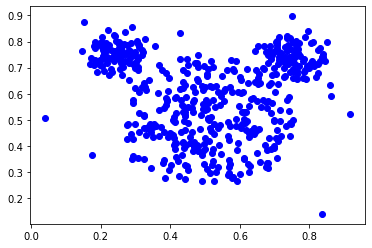

In [5]:
plt.plot(X[:,0], X[:,1], 'bo')
plt.show()

On observe ainsi la représentation graphique de ces données. On retrouve bien le dessin de la tête de Mickey Mouse, le personnage de Disney. On observe également dix points aberrants qui sortent du tracé originale. On va s'attacher à les retrouver numériquement à l'aide de la procédure isolation forest.

### Détection des anomalies dans ce jeu de données

Nous allons appliquer la procédure d'outlier detection non supervisé Isolation Forest fourni par la bibliothèque scikit learn.

In [6]:
from sklearn.ensemble import IsolationForest

On utilise d'abord la fonction .predict afin de laisser le module fixer le seuil en fonction du paramètre contamination fournit dans l'IF. On a renseigné une valeur de 500/10=0.02 sachant que l'on a 10 valeurs aberrantes dans le jeu de données.

In [7]:
IF1 = IsolationForest(n_estimators=500, contamination=0.02)
IF1.fit(X)
anomalie1 = IF1.predict(X)

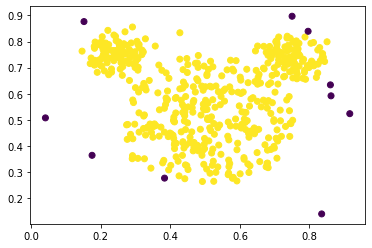

In [8]:
plt.scatter(X[:,0], X[:,1], c=anomalie1)
plt.show()

On remarque ainsi que parmi les 10 valeurs aberrantes fourni par la procédure, 8 correspondent clairement à des valeurs aberrantes, tandis que 2 sont très proches du motif. On notera surtout qu'une autre valeur clairement aberrante à vue d'oeil n'a pas été détectée.

On applique à nouveau la procédure Isolation Forest mais cette fois-ci on souhaite d'abord observer les valeurs de décision puis de fixer un seuil cohérent à partir de ces informations.

In [9]:
IF2 = IsolationForest(n_estimators=500)
IF2.fit(X)
decision = IF2.decision_function(X)

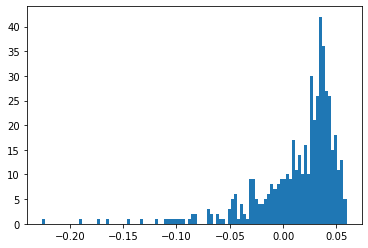

In [10]:
plt.hist(decision, bins=100)
plt.show()

On remarque une rupture juste avant -0.10 dans la distribution des valeurs. On va donc retenir -0.095 comme la valeur de décision seuil entre les valeurs normales et les valeurs aberrantes

In [11]:
anomalie2 = decision.copy()
anomalie2[decision<=-0.095] = 1
anomalie2[decision>-0.095] = 0

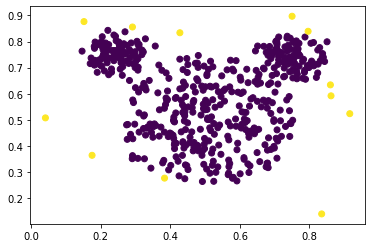

In [12]:
plt.scatter(X[:,0], X[:,1], c=anomalie2)
plt.show()

Il semblerait cette fois ci que nous sommes parvenus à détecter l'ensemble des valeurs aberrantes. Toutefois nous en détections 11 avec le seuil de décision choisi. En effet on remarque dans l'oreil droite une valeur qui ne devrait peut être pas aberrante. Nous avons ainsi réalisé une détection d'anomalies très pertinentes à l'aide de la procédure non supervisé Isolation Forest.

## Jeu de données Cartes de crédit

Pour des raisons de confidentialité, les variables explicatives de ce jeu données sont le résultats d'une transformation par ACP et les variables originales ne sont pas fournies. À cela s'ajoute deux variables Time et Amount. Nous ne tiendrons pas compte de la variable Time ici.

In [33]:
credit_data = pd.read_csv('./creditcard.csv')

In [34]:
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Préparation du jeu de données

Nous allons redimensionner le jeu de données en ne gardant que 5000 transactions normales et toutes les transactions aberrantes. De plus nous allons enlever la variable Time.

In [35]:
credit_data = credit_data.drop('Time', axis=1)
credit_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [36]:
credit_data.groupby('Class').count()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,...,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315
1,492,492,492,492,492,492,492,492,492,492,...,492,492,492,492,492,492,492,492,492,492


In [32]:
resampled_credit_data = credit_data[credit_data.Class==1.0].append(credit_data[credit_data.Class==0.0].sample(n=5000))
resampled_credit_data.groupby('Class').count()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,...,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000
1,492,492,492,492,492,492,492,492,492,492,...,492,492,492,492,492,492,492,492,492,492


In [37]:
X = resampled_credit_data.drop('Class',axis=1).values
y = resampled_credit_data['Class'].values

### Application de la technique Isolation Forest

Tout d'abord, on va appliquer la méthode Isolation Forest avec les paramètres de base.

In [38]:
def apply_IF(X,IF):
    IF.fit(X)
    y_pred = IF.predict(X)
    y_pred[y_pred==1]=0 # change 1 to 0 to fit with class
    y_pred[y_pred<0]=1 # change -1 to 1 to fit with class
    decision = IF.decision_function(X)

    return(y_pred,decision)

IF_base = IsolationForest(random_state=10)
y_pred_base, decision_base = apply_IF(X,IF_base)

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred_base)

array([[4932,   68],
       [ 214,  278]])

Calculons le Rappel et la Précision :

In [40]:
from sklearn.metrics import recall_score , precision_score

print("recall : {}%".format(round(recall_score(y, y_pred_base)*100,1)))
print("precision : {}%".format(round(precision_score(y, y_pred_base)*100,1)))

recall : 56.5%
precision : 80.3%


Nous remarquons que la précision est plus élevée que le rappel. La valeur de rappel nous indique que seulement 56,5% des fraudes effectives sont détectées ce qui n'est pas satisfaisant car les fraudes non détectées provoquent un désagrément important chez l'usager. La valeur de précision nous intéresse un peu moins car il vaut mieux prédire une fraude qui n'en est pas une que l'inverse. D'autant plus que les faux positifs ici ne représentent qu'un faible pourcentage du nombre de transactions totales. Au lieu de regarder la précision, il serait plus judiciuex de regarder le rappel du point de vue des transactions légales. Néanmoins, il faut veiller à ce que cette valeur de précision ne soit pas trop mauvaise non plus car détecter trop de fraudes qui n'en sont pas peut entraîner une perte de crédibilité.

**Ajout d'une valeur de contamination**

Nous allons essayer d'améliorer ces performances en jouant sur les paramètres du modèle. Tout d'abord regardons l'effet de rajouter une valeur de contamination. Ceci suppose que nous connaissons à l'avance une estimation de la proportion de transactions frauduleuses, ce qui dans ce contexte semble possible puisque les banques doivent réaliser des statistiques de ce type.

In [43]:
IF = IsolationForest(contamination = 492/5492,random_state=10)
y_pred, decision = apply_IF(X,IF)
print(confusion_matrix(y, y_pred))
print("recall : {}%".format(round(recall_score(y, y_pred)*100,1)))
print("precision : {}%".format(round(precision_score(y, y_pred)*100,1)))

[[4859  141]
 [ 141  351]]
recall : 71.3%
precision : 71.3%


On remarque que l'ajout du paramètre de contamination permet d'améliorer le rappel mais on a une perte de précision. On peut sûrement encore améliorer ce rappel en jouant sur la valeur de seuil que l'on peut choisir grâce aux valeurs de décision

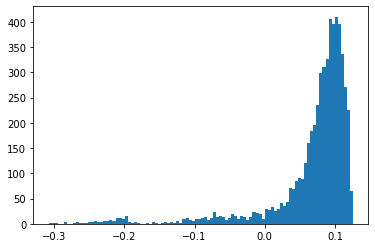

In [44]:
plt.hist(decision, bins=100)
plt.show()

In [49]:
y_seuil = decision.copy()
y_seuil[decision<0.025] = 1
y_seuil[decision>=0.025] = 0

In [50]:
print(confusion_matrix(y, y_seuil))
print("recall : {}%".format(round(recall_score(y, y_seuil)*100,1)))
print("precision : {}%".format(round(precision_score(y, y_seuil)*100,1)))

[[4735  265]
 [  91  401]]
recall : 81.5%
precision : 60.2%


En augmentant le seuil de décision, on arrive à augmenter la valeur de rappel, néanmoins on observe une dégradation de la précision ce qui est logique. On peut peut-être améliorer les performances de l'algorithme en faisant varier le nombre d'arbres utilisés.

In [51]:
IF = IsolationForest(n_estimators = 500,contamination = 492/5492,random_state=10)
y_pred, decision = apply_IF(X,IF)
print(confusion_matrix(y, y_pred))
print("recall : {}%".format(round(recall_score(y, y_pred)*100,1)))
print("precision : {}%".format(round(precision_score(y, y_pred)*100,1)))

[[4854  146]
 [ 146  346]]
recall : 70.3%
precision : 70.3%


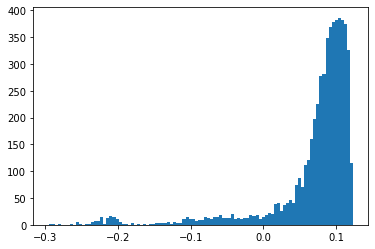

In [52]:
plt.hist(decision, bins=100)
plt.show()

In [53]:
y_seuil = decision.copy()
y_seuil[decision<0.025] = 1
y_seuil[decision>=0.025] = 0
print(confusion_matrix(y, y_seuil))
print("recall : {}%".format(round(recall_score(y, y_seuil)*100,1)))
print("precision : {}%".format(round(precision_score(y, y_seuil)*100,1)))

[[4741  259]
 [  95  397]]
recall : 80.7%
precision : 60.5%


Il semblerait que l'augmentation du nombre d'arbres ne permette pas d'améliorer les performances. Pour tuner au mieux les paramètres à cette application, il faudrait qu'on connaisse le *coût* d'une fraude et de faire varier les nombre d'arbres et le seuil pour optimiser, c'est-à-dire obtenir la valeur de rappel maximale sans avoir une précision trop mauvaise. On pourrait imaginer que le prestataire nous impose un nombre de fraudes minimales à détecter, ce qui imposerait une valeur de rappel minimale.